In [219]:
import pandas as pd
import numpy as np

In [220]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [221]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [222]:
df.shape

(5572, 5)

Now we do 
Data cleaning
EDA
Text Processing
Model Building
evaluation
improvements
pikle file
website
deploy

# Data Cleaning

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [224]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)

In [225]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [226]:
df.rename(columns={'v1':'target','v2': 'msg'}, inplace=True)

In [227]:
df.head()

,target,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [228]:
from sklearn.preprocessing import LabelEncoder

In [229]:
encoder = LabelEncoder()

In [230]:
df['target'] = encoder.fit_transform(df['target'])

In [231]:
df.head()

,target,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [232]:
df.isnull().sum()

target    0
msg       0
dtype: int64

In [233]:
# check duplicate values
df.duplicated().sum()

403

In [234]:
df = df.drop_duplicates(keep= 'first')

In [235]:
df.shape

(5169, 2)

# EDA

In [236]:
#checking how many are spam and not spam ie 0, 1
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [237]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7fec80b5cb20>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

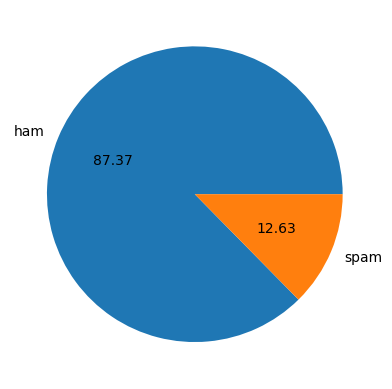

In [238]:
plt.pie(df['target'].value_counts(), labels= ['ham','spam'], autopct='%0.2f')

In [239]:
# Data is Imbalanced

In [240]:
import nltk

In [241]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/shashank/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [242]:
df['num_chars'] = df['msg'].apply(len)

In [243]:
df.head()

,target,msg,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [244]:
# fetching number of words
df['num_words'] = df['msg'].apply(lambda x: len(nltk.word_tokenize(x)))

In [245]:
df['num_sentences'] = df['msg'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [246]:
df.head()

,target,msg,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [247]:
df.describe()

,target,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [248]:
#spam
df[df['target'] == 0].describe()

,target,num_chars,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [249]:
#ham
df[df['target'] == 1].describe()

,target,num_chars,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


In [250]:
import seaborn as sns

<AxesSubplot:xlabel='num_chars', ylabel='Count'>

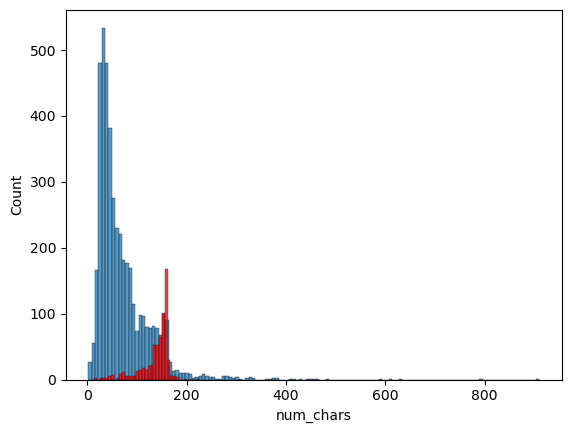

In [251]:
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

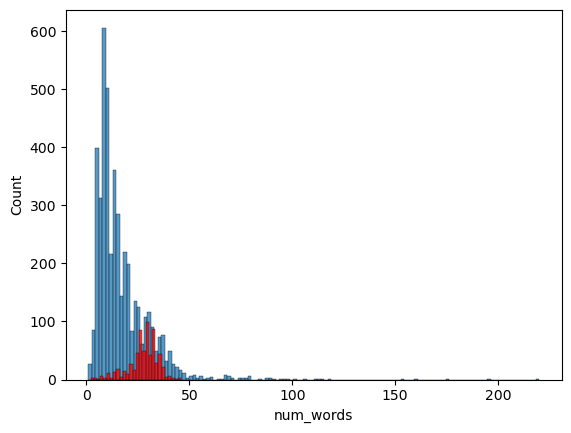

In [252]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

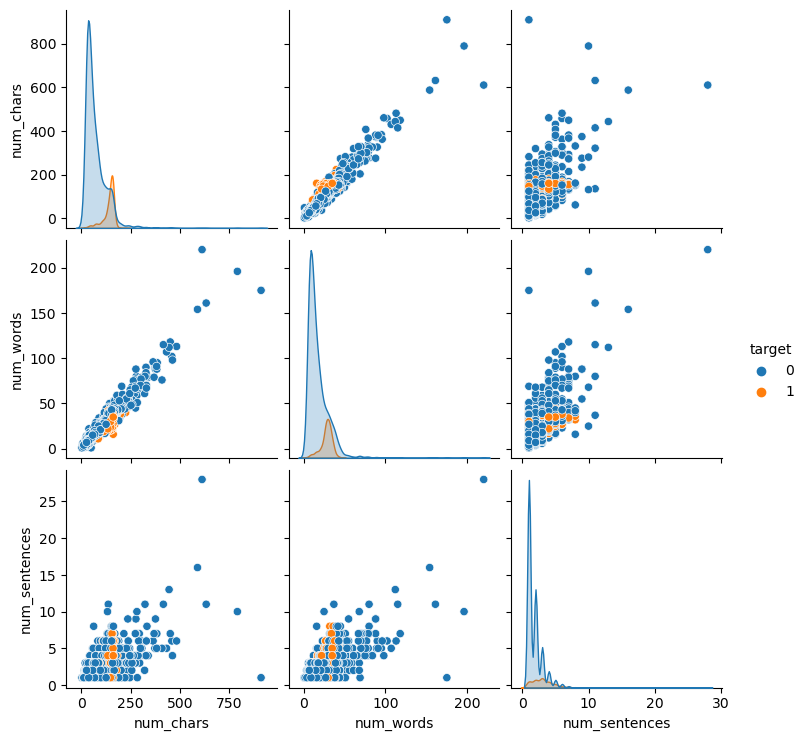

In [253]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

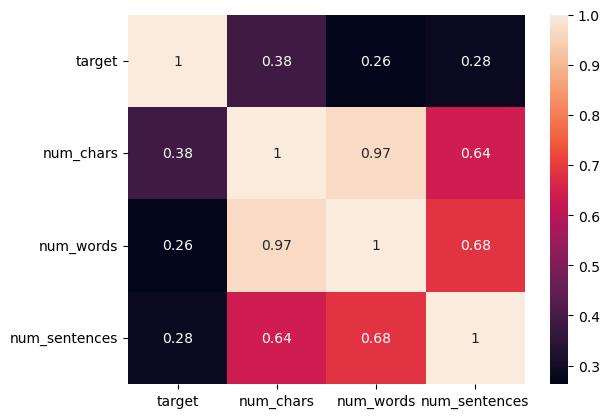

In [254]:
sns.heatmap(df.corr(), annot=True)

In [255]:
# We choose only one column for our model ie num_chars

# Data Preprocessing

In [256]:
# Lower case
# tokenization
# removing special char
# remove stop words and puntuation (is, of ,the etc)
# stemming (lemetization)(go, goes, going is all the same)

In [257]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [258]:
def transform_msg(msg):
    msg = msg.lower()
    msg = nltk.word_tokenize(msg)
    y = []
    for i in msg:
        if i.isalnum():
            y.append(i)
    
    msg = y[:]
    y.clear()
    
    for i in msg:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    msg = y[:]
    y.clear()
    
    for i in msg:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [259]:
#nltk.download('stopwords')

In [260]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [261]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [262]:
transform_msg("hi wassup%% did you like my presentation on ml")

'hi wassup like present ml'

In [263]:
df['transformed_msg'] = df['msg'].apply(transform_msg)

In [264]:
df.head()

,target,msg,num_chars,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [265]:
#! pip install wordcloud

In [266]:
from wordcloud import WordCloud

In [267]:
wc = WordCloud(width=500,height=300, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed_msg'].str.cat(sep=' '))

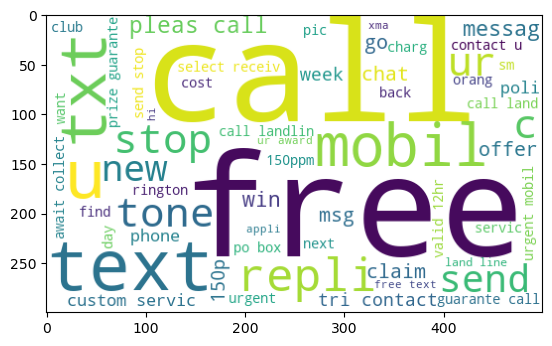

In [268]:
plt.imshow(spam_wc)

In [269]:
ham_wc = wc.generate(df[df['target']==0]['transformed_msg'].str.cat(sep=' '))

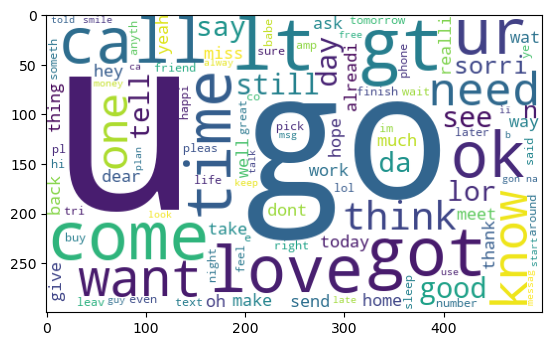

In [270]:
plt.imshow(ham_wc)

In [271]:
# we select the top 30 words

In [272]:
df.head()

,target,msg,num_chars,num_words,num_sentences,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [273]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_msg'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [274]:
len(spam_corpus)

9939

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


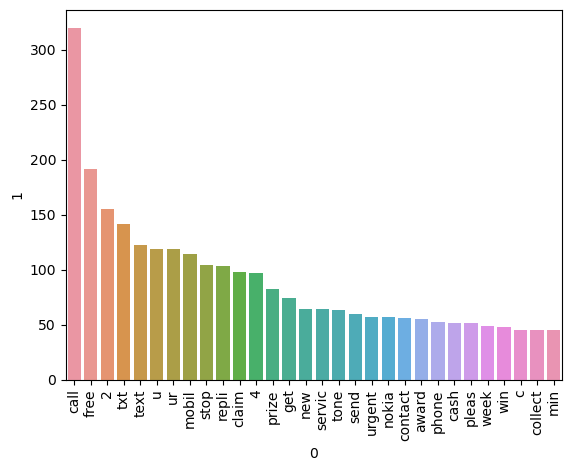

In [275]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [276]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_msg'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [277]:
len(ham_corpus)

35394

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


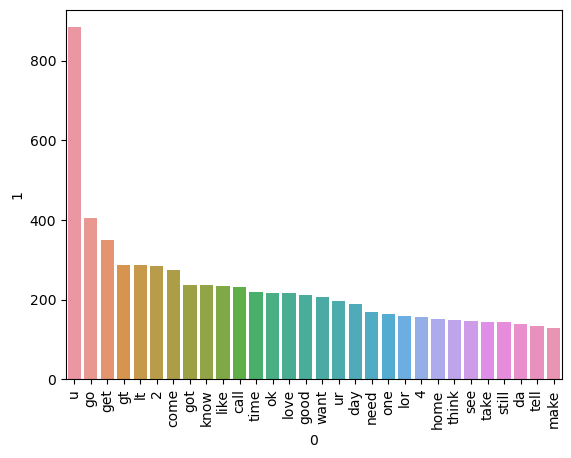

In [278]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [279]:
# Naive will work better for textual data

In [280]:
# for model we have to convert words to numbers ie vector using TFIDF or bag of words

In [332]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()
cv = CountVectorizer()

In [333]:
X = tfidf.fit_transform(df['transformed_msg']).toarray()

In [334]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [335]:
X.shape

(5169, 6708)

In [336]:
y = df['target'].values

In [337]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [338]:
from sklearn.model_selection import train_test_split

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [340]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [341]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [342]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8636363636363636
[[783 123]
 [ 18 110]]
0.4721030042918455


In [343]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9574468085106383
[[906   0]
 [ 44  84]]
1.0


In [344]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[900   6]
 [ 23 105]]
0.9459459459459459


In [345]:
# tfidf mnb gives precision score is 1

In [346]:
# Testing with all the ML models

In [347]:
#! pip install xgboost

In [348]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [349]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=5)
abc = AdaBoostClassifier(n_estimators=50, random_state=5)
bc = BaggingClassifier(n_estimators=50, random_state=5)
etc = ExtraTreesClassifier(n_estimators=50, random_state=5)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=5)
xgb = XGBClassifier(n_estimators=50, random_state=5)

In [350]:
clafs = {
    'SVC' : svc,
    'KNN' : knc,
    'MNB' : mnb,
    'DTC' : dtc,
    'LR' : lrc,
    'RFC' : rfc,
    'AdaBost' : abc,
    'BC' : bc,
    'ETC' : etc,
    'GBC' : gbc,
    'XGB' : xgb
}

In [351]:
def train_classifer(clf, X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [352]:
#testing our method
train_classifer(svc,X_train,y_train,X_test,y_test)

(0.9690522243713733, 0.9615384615384616)

In [353]:
accuracy_scores = []
precision_scores = []

for name,clf in clafs.items():
    
    curr_accuracy,curr_precision = train_classifer(clf, X_train,y_train,X_test,y_test)
    
    print("for ",name)
    print("Accuracy", curr_accuracy)
    print("Precision", curr_precision)
    
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)

for  SVC
Accuracy 0.9690522243713733
Precision 0.9615384615384616


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


for  KNN
Accuracy 0.90715667311412
Precision 1.0
for  MNB
Accuracy 0.9574468085106383
Precision 1.0
for  DTC
Accuracy 0.9429400386847195
Precision 0.8053097345132744
for  LR
Accuracy 0.9506769825918762
Precision 0.9425287356321839
for  RFC
Accuracy 0.9671179883945842
Precision 0.9795918367346939
for  AdaBost
Accuracy 0.9680851063829787
Precision 0.9439252336448598
for  BC
Accuracy 0.9700193423597679
Precision 0.907563025210084
for  ETC
Accuracy 0.971953578336557
Precision 0.9805825242718447
for  GBC
Accuracy 0.9487427466150871
Precision 0.9032258064516129
for  XGB
Accuracy 0.9709864603481625
Precision 0.9454545454545454


In [354]:
# for better visualization we put them in DataFrame
performance_df = pd.DataFrame({'Algo': clafs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision',ascending=False)

In [355]:
performance_df

,Algo,Accuracy,Precision
1,KNN,0.907157,1.000000
2,MNB,0.957447,1.000000
8,ETC,0.971954,0.980583
5,RFC,0.967118,0.979592
0,SVC,0.969052,0.961538
10,XGB,0.970986,0.945455
6,AdaBost,0.968085,0.943925
4,LR,0.950677,0.942529
7,BC,0.970019,0.907563
9,GBC,0.948743,0.903226


In [356]:
# ETC, MNB, RF, SVC has better accuracy and precision
#MNB is giving the best I feel 

In [357]:
# Well try to improve the model if possible

In [358]:
performance_df1 = pd.melt(performance_df, id_vars='Algo')
performance_df1

,Algo,variable,value
0,KNN,Accuracy,0.907157
1,MNB,Accuracy,0.957447
2,ETC,Accuracy,0.971954
3,RFC,Accuracy,0.967118
4,SVC,Accuracy,0.969052
5,XGB,Accuracy,0.970986
6,AdaBost,Accuracy,0.968085
7,LR,Accuracy,0.950677
8,BC,Accuracy,0.970019
9,GBC,Accuracy,0.948743


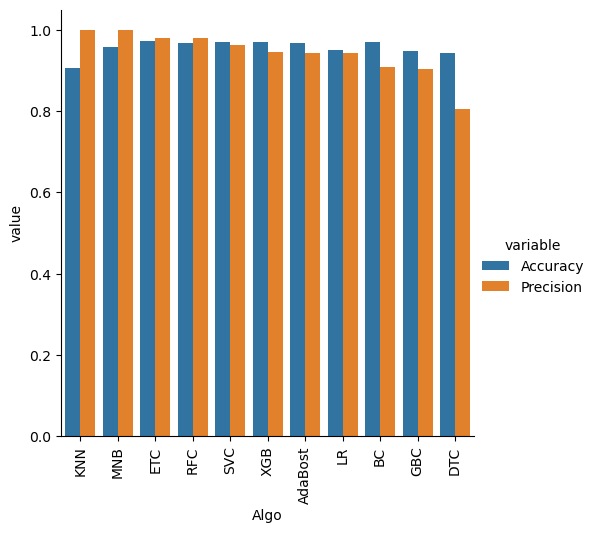

In [359]:
sns.catplot(x= 'Algo', y= 'value', hue = 'variable', data=performance_df1, kind='bar', height=5)
plt.xticks(rotation='vertical')
plt.show()

In [361]:
# when we are using tfidf we use max_features = some value, Ill try 1000,2000,3000
# but it did not improve hence the best model is MNB

In [362]:
import pickle

In [363]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('mnbmodel.pkl','wb'))